<a href="https://colab.research.google.com/github/lonelu/Rvrsprot/blob/main/Colab_Rvrsprot_loops_connect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rvrsprot_master_loops_connect_colab
DeGrado Lab, UCSF.

The program is used for connecting target backbone and loops. 

In [6]:
#@title Upload pdb
import os
from google.colab import files
import re
import datetime
import shutil
#@markdown Define job
jobname = 'loop_connect' 
NumberOfloops = 3 #@param {type:"integer"}
title = 'combined' #@param {type:"string"}
target_start = 'A,75,ALA' #@param {type:"string"}
target_end = 'A,74,ALA' #@param {type:"string"}
user_define_connection = False #@param {type:"boolean"}

time_tag = datetime.datetime.now().strftime('%Y%m%d-%H%M%S') 

jabname = jobname + '_' + time_tag
workdir = '/content/' + jobname  + '/'
if not os.path.exists(workdir):
  os.mkdir(workdir)

#@markdown Upload pdb prompt
filepaths = []
filenames = []
for i in range(NumberOfloops + 1):
  uploaded = files.upload()
  fn = list(uploaded.keys())[0]
  count = fn.count(".") - 1
  newfn = fn.replace('.', '-', count)
  newfn = fn.replace('_', '-')
  pdbname = newfn.split('.')[0]
  shutil.copyfile(fn, workdir + pdbname + '.pdb')
  filepaths.append(workdir + pdbname + '.pdb')
  filenames.append(pdbname)

print(workdir)
print(filepaths)

Saving 00009.f63440efff7e.allbb_ala_min_ala_0001.pdb to 00009.f63440efff7e.allbb_ala_min_ala_0001 (2).pdb


Saving A-104-110-A-113-119_cent_rg_5_clu_66.pdb to A-104-110-A-113-119_cent_rg_5_clu_66 (1).pdb


Saving A-138-144-A-5-11_cent_rg_4_clu_14.pdb to A-138-144-A-5-11_cent_rg_4_clu_14 (2).pdb


Saving A-30-36-A-39-45_cent_rg_5_clu_121.pdb to A-30-36-A-39-45_cent_rg_5_clu_121 (1).pdb
/content/loop_connect_20230119-173832/
['/content/loop_connect_20230119-173832/00009.pdb', '/content/loop_connect_20230119-173832/A-104-110-A-113-119-cent-rg-5-clu-66.pdb', '/content/loop_connect_20230119-173832/A-138-144-A-5-11-cent-rg-4-clu-14.pdb', '/content/loop_connect_20230119-173832/A-30-36-A-39-45-cent-rg-5-clu-121.pdb']


In [4]:
#@title Install Rvrsprot.

%%bash -s

set -e

cd /content

rm -rf RVRSPROT_READY METALPROT_READY

if [ ! -f RVRSPROT_READY ]; then
  echo "Cloning Rvrsprot..."
  rm -rf Rvrsprot
  git clone https://github.com/lonelu/Rvrsprot.git
  cd /content/Rvrsprot
  pip install -e . &> /dev/null
  touch RVRSPROT_READY
fi

cd /content/

if [ ! -f METALPROT_READY ]; then
  echo "Cloning Metalprot..."
  rm -rf Metalprot
  git clone https://github.com/lonelu/Metalprot.git

  cd /content/Metalprot
  pip install -e . &> /dev/null
  touch METALPROT_READY
fi

chmod 777 /content/Rvrsprot/rvrsprot/external/createPDS
chmod 777 /content/Rvrsprot/rvrsprot/external/parsePDS
chmod 777 /content/Rvrsprot/rvrsprot/external/master


#download database and change list filepath.
pip install logomaker &> /dev/null
pip install fpdf &> /dev/null


Cloning Rvrsprot...
Cloning Metalprot...


Cloning into 'Rvrsprot'...
Cloning into 'Metalprot'...


In [57]:
#@title Run loop connection distance map.

%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}



import os
import sys
sys.path.append(r'/content/Metalprot')
sys.path.append(r'/content/Rvrsprot')
from rvrsprot.loop import connect_loops
import datetime
import subprocess
import prody as pr

#connect_loops.connect_struct(workdir, title, filepaths[0], filepaths[1:], target_start, target_end)

outdir = workdir
targetpath = filepaths[0]
looppaths = filepaths[1:]
target_sels= [] 
loop_sels = []

target = pr.parsePDB(targetpath)
loops = [pr.parsePDB(looppath) for looppath in looppaths]
if len(target_sels) > 0:
    structs, sels = connect_loops.generate_sel_from_input(target, loops, target_sels, loop_sels)
else:
    structs, sels = connect_loops.auto_generate_sels(target, loops, outdir, target_start, target_end)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/content/loop_connect_20230119-173832/A-104-110-A-113-119-cent-rg-5-clu-66_info.png


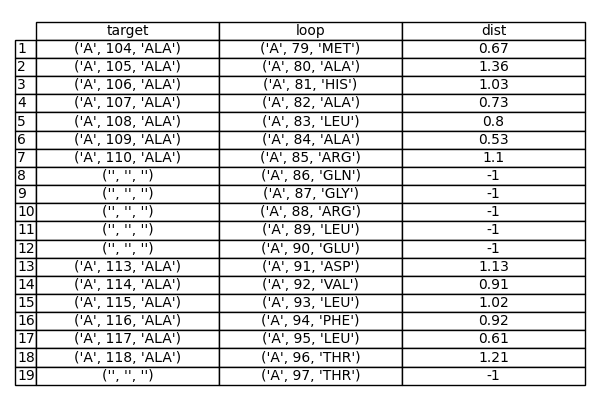

/content/loop_connect_20230119-173832/A-138-144-A-5-11-cent-rg-4-clu-14_info.png


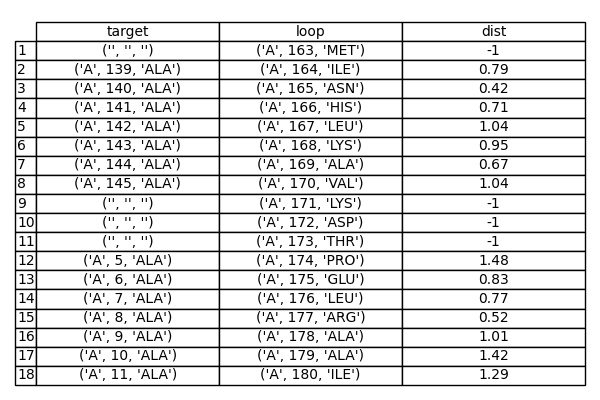

/content/loop_connect_20230119-173832/A-30-36-A-39-45-cent-rg-5-clu-121_info.png


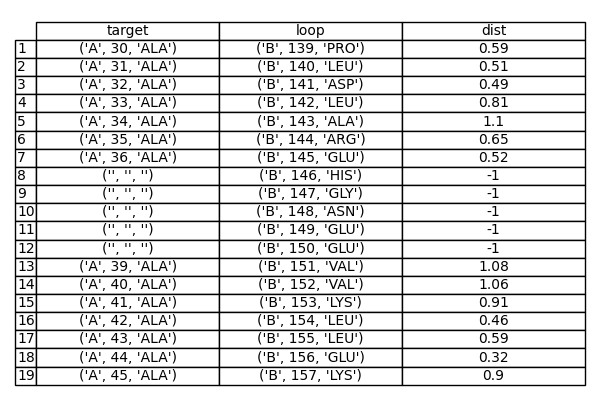

In [60]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))


from matplotlib import pyplot as plt
from IPython.display import Image

from google.colab.patches import cv2_imshow
import cv2

for i in range(3):
  img_path = workdir + filenames[i+1] + '_info.png'
  print(img_path)
  img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)

In [48]:
#@title Generate selections text.

auto_sels = ''
for i in range(2*NumberOfloops + 1):
  #print(structs[i].getTitle())
  #print(sels[i])
  auto_sels += structs[i].getTitle() + ',' + sels[i][0][0] + ',' + str(sels[i][0][1]) + ',' + sels[i][1][0] + ',' + str(sels[i][1][1]) + '\n'

print(auto_sels)

00009,A,75,A,108
A-104-110-A-113-119-cent-rg-5-clu-66,A,84,A,95
00009,A,118,A,139
A-138-144-A-5-11-cent-rg-4-clu-14,A,165,A,177
00009,A,9,A,31
A-30-36-A-39-45-cent-rg-5-clu-121,B,141,B,156
00009,A,45,A,74



In [65]:
#@title Connect and download.

sys.path.append(r'/content/Metalprot')
sys.path.append(r'/content/Rvrsprot')
from rvrsprot.loop import connect_loops
import prody as pr

user_define_connection = False
if user_define_connection:
  user_sel = input ("Enter selections :") 
  all_sels = user_sel.split(' ')
  #print(all_sels)
  sels = []
  for i in range(2*NumberOfloops + 1):
    sels.append(((all_sels[i].split(',')[1], all_sels[i].split(',')[2]), (all_sels[i].split(',')[3], all_sels[i].split(',')[4])))
  #print(sels)

ags = connect_loops.generate_ags(structs, sels)

combined_ag = connect_loops.combine_ags_into_one_chain(ags, title)

pr.writePDB(outdir + title, combined_ag)

!zip -FSrq $workdir".zip" $workdir"/"
files.download(workdir + '.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The program is for DeGrado lab internal usage now (10/25/2022).

Please contact lonelur@gmail.com if you find something wrong or if you have special suggestions to help other researchers.